In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [73]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#importing the data in features
X=df[['age','fare']]
X.age.fillna(value=X['age'].mean(),inplace=True)

#scaled data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#perform clustering
model = KMeans(n_clusters=3)
model.fit(X_scaled)

# assign clusters labels to the data
df['cluster']=model.labels_

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_15552\453534484.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [75]:
df['cluster'].nunique()

3

In [76]:
df['cluster'].unique()

array([0, 2, 1])

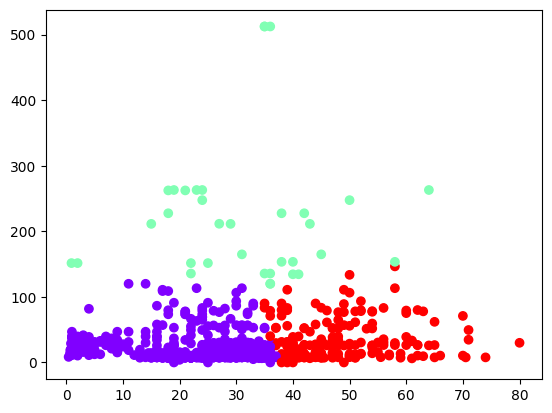

In [77]:
plt.scatter(df['age'],df['fare'],c=df['cluster'],cmap='rainbow')

plt.show()

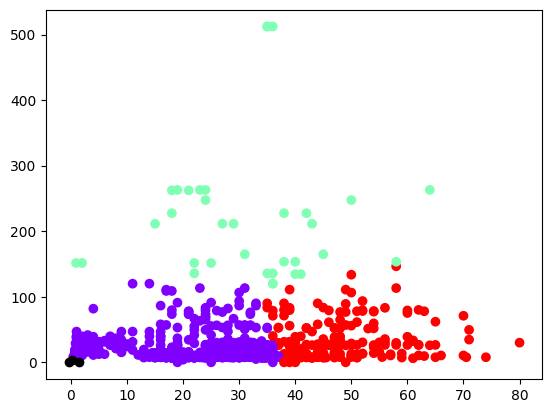

In [78]:
plt.scatter(df['age'],df['fare'],c=df['cluster'],cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
plt.show()

In [79]:
import plotly.express as px
fig=px.scatter(df,x='age',y='fare',color='cluster')
fig.show()

In [80]:
import plotly.express as px
fig=px.scatter_3d(df,x='age',y='fare',z='pclass', color='cluster')
fig.show()

In [81]:
fig = px.parallel_coordinates(df, color='cluster',title='Titanic Cluster')
fig.show()

C:\Users\ADMIN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\plotly\express\_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



# FOR SAVE ML MODEL INSTALL BELOW BOTH LIBRARIES

In [82]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [83]:
pip install pickle

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: C:\Users\ADMIN\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


# SAVING THE ML MODEL

In [84]:
# saving the model
import joblib
joblib.dump(model,'K-means_clustering.joblib')

['K-means_clustering.joblib']

# LOAD THE SAVE MODEL

In [85]:
# Load the Save Model
model_loaded = joblib.load('K-means_clustering.joblib')

# HOW TO USE AND LOAD A EXISTING MODEL

In [86]:
import seaborn  as sns

df_1 = sns.load_dataset('tips')
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [87]:
df_1.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [88]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [89]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df_1['smoker'])

df_1['smoker'] = le.transform(df_1['smoker'])


In [90]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df_1['day'])

df_1['day'] = le.transform(df_1['day'])

In [91]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
le.fit(df_1['time'])

df_1['time'] = le.transform(df_1['time'])

In [92]:
df_1

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,0,2,0,2
1,10.34,1.66,Male,0,2,0,3
2,21.01,3.50,Male,0,2,0,3
3,23.68,3.31,Male,0,2,0,2
4,24.59,3.61,Female,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,0,1,0,3
240,27.18,2.00,Female,1,1,0,2
241,22.67,2.00,Male,1,1,0,2
242,17.82,1.75,Male,0,1,0,2


In [93]:
X=df_1.drop(columns=['sex'])
y=df_1['sex']

In [94]:
X.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,0,2,0,2
1,10.34,1.66,0,2,0,3
2,21.01,3.50,0,2,0,3
3,23.68,3.31,0,2,0,2
4,24.59,3.61,0,2,0,4


In [95]:
y.head()

0    Female
1      Male
2      Male
3      Male
4    Female
Name: sex, dtype: category
Categories (2, object): ['Male', 'Female']

In [97]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()
model=model.fit(X,y)

# Save Decision Tree Model

In [98]:
joblib.dump(model,"tipsmoel.joblib")

['tipsmoel.joblib']

# Load Model and save with different Name

In [99]:
model_1=joblib.load('tipsmoel.joblib')

# SAVE AND LOAD THROUGH PICKLE ALSO ANOTHER OPTION FOR MODEL

In [100]:
import pickle
# save the model
with open('model.pkl','wb') as f:
    pickle.dump(model,f)
    
#load the model
with open('model.pkl','rb') as f:
    loaded_model=pickle.load(f)